In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,6


In [2]:
dataset=pd.read_csv("C:/Users/ompra/Desktop/datasets/ONGC__EQ__NSE__NSE__MINUTE.csv")
#string to data time type
dataset['date']=pd.to_datetime(dataset['date'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['date'])

In [3]:
dataset.head()

,date,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,191.85,191.95,191.35,191.90,16040.0
1,2017-01-02 09:16:00+05:30,191.90,192.20,191.70,192.10,15994.0
2,2017-01-02 09:17:00+05:30,192.10,192.10,191.70,191.70,24452.0
3,2017-01-02 09:18:00+05:30,191.65,192.00,191.55,192.00,15804.0
4,2017-01-02 09:19:00+05:30,192.00,192.00,191.80,191.95,10282.0


In [4]:
from datetime import datetime
indexedDataset.head(5)


,open,high,low,close,volume
date,,,,,
2017-01-02 09:15:00+05:30,191.85,191.95,191.35,191.90,16040.0
2017-01-02 09:16:00+05:30,191.90,192.20,191.70,192.10,15994.0
2017-01-02 09:17:00+05:30,192.10,192.10,191.70,191.70,24452.0
2017-01-02 09:18:00+05:30,191.65,192.00,191.55,192.00,15804.0
2017-01-02 09:19:00+05:30,192.00,192.00,191.80,191.95,10282.0


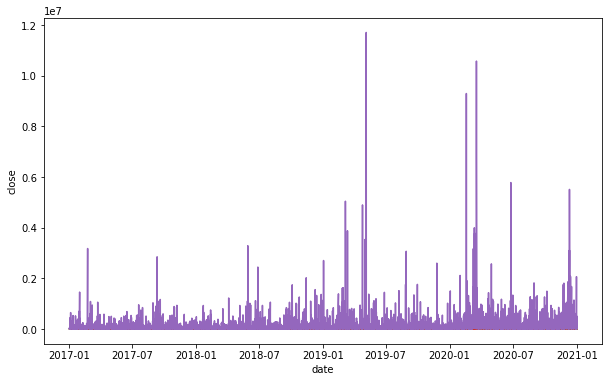

In [5]:
#plot graph
plt.xlabel("date")
plt.ylabel("close")
plt.plot(indexedDataset)


In [6]:
#determine rolling statistics
rolmean=indexedDataset.rolling(window=365).mean()
rolstd=indexedDataset.rolling(window=365).std()
print(rolmean,rolstd)


                                open       high        low      close  \
date                                                                    
2017-01-02 09:15:00+05:30        NaN        NaN        NaN        NaN   
2017-01-02 09:16:00+05:30        NaN        NaN        NaN        NaN   
2017-01-02 09:17:00+05:30        NaN        NaN        NaN        NaN   
2017-01-02 09:18:00+05:30        NaN        NaN        NaN        NaN   
2017-01-02 09:19:00+05:30        NaN        NaN        NaN        NaN   
...                              ...        ...        ...        ...   
2021-01-01 15:25:00+05:30  93.337945  93.386027  93.294247  93.337808   
2021-01-01 15:26:00+05:30  93.336712  93.384384  93.292877  93.336438   
2021-01-01 15:27:00+05:30  93.335068  93.382466  93.291096  93.334247   
2021-01-01 15:28:00+05:30  93.333151  93.380548  93.289863  93.332466   
2021-01-01 15:29:00+05:30  93.331370  93.378767  93.288493  93.330959   

                                 volume  
date    

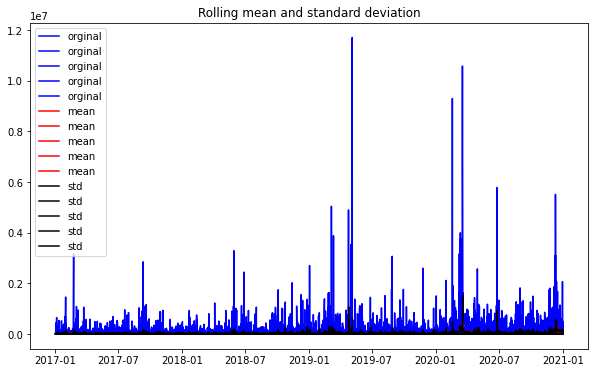

In [7]:
#plotting rolling statistic
orig=plt.plot(indexedDataset,color='blue',label='orginal')
mean=plt.plot(rolmean,color='red',label='mean')
std=plt.plot(rolstd,color='black',label='std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block=False)


In [8]:
#perform dickey fuller test
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey fuller test:')
dftest=adfuller(indexedDataset['close'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key]=value
print(dfoutput)    

Result of Dickey fuller test:


MissingDataError: exog contains inf or nans

<ipython-input-9-a526b1ff2580>:2: RuntimeWarning: divide by zero encountered in log
  indexedDataset_logScale=np.log(indexedDataset)


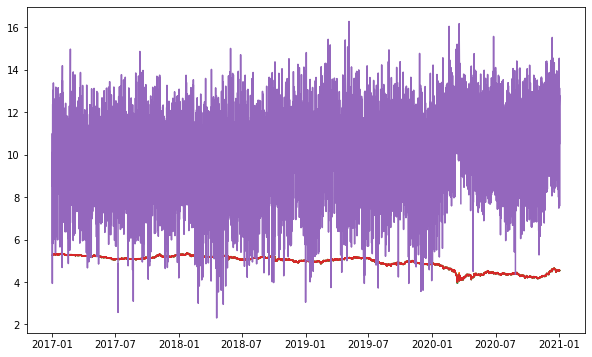

In [9]:
#estimate the trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

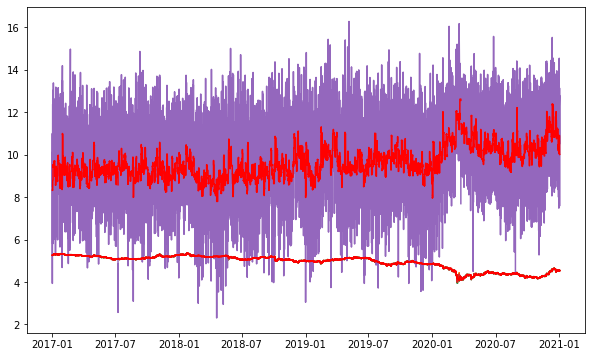

In [11]:
movingAverage=indexedDataset_logScale.rolling(window=365).mean()
movingSTD=indexedDataset_logScale.rolling(window=365).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [12]:
#datasetLogScaleMinusMovingAverage
dlsma=indexedDataset_logScale-movingAverage
dlsma.head(12)
#remove NAn values
dlsma.dropna(inplace=True)
dlsma.head(10)

,open,high,low,close,volume
date,,,,,
2017-01-02 15:19:00+05:30,-0.000409,0.000211,0.000156,0.000119,1.150944
2017-01-02 15:20:00+05:30,-0.000674,-0.000056,-0.000376,0.000372,1.315493
2017-01-02 15:21:00+05:30,-0.000678,-0.000318,-0.000642,0.000108,1.721615
2017-01-02 15:22:00+05:30,0.000098,0.000456,0.000650,0.000617,1.379260
2017-01-02 15:23:00+05:30,0.000348,0.000190,0.000379,-0.000167,0.426071
2017-01-02 15:24:00+05:30,-0.000177,0.000184,-0.000147,-0.000431,1.727435
2017-01-02 15:25:00+05:30,-0.000441,0.000176,0.000104,-0.000178,0.888148
2017-01-02 15:26:00+05:30,-0.000188,0.000944,0.000355,0.000851,1.642806
2017-01-02 15:27:00+05:30,0.000841,0.000677,0.000866,0.000325,1.100520


In [13]:
#adcf test
def test_stationarity(timeseries):
    #determining the rolling statistics
    movingAverage=timeseries.rolling(window=365).mean()
    movingSTD=timeseries.rolling(window=365).std()
    
    #plot rolling statsistics
    orig=plt.plot(timeseries,color='blue',label='orginal')
    mean=plt.plot(movingAverage,color='red',label='mean')
    std=plt.plot(movingSTD,color='black',label='std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    plt.show(block=False)
    
    #perform Dickey fuller test
    from statsmodels.tsa.stattools import adfuller
    print('Result of Dickey fuller test:')
    dftest=adfuller(timeseries['close'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Values (%s)'%key]=value
    print(dfoutput)
    

    

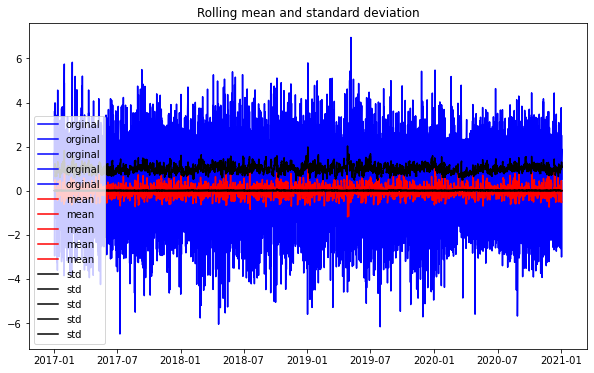

Result of Dickey fuller test:


MemoryError: Unable to allocate 117. MiB for an array with shape (42, 365576) and data type float64

In [14]:
test_stationarity(dlsma)

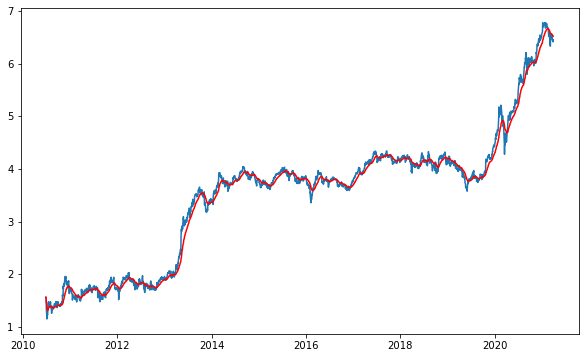

In [33]:
#calculate weighted average of time series
edwa=indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(edwa,color='red')


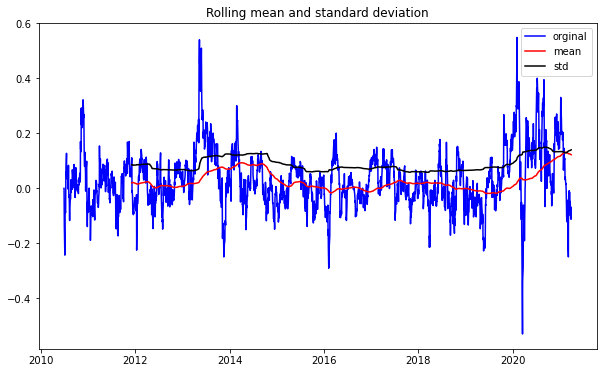

Result of Dickey fuller test:
Test Statistic                -8.636745e+00
p-value                        5.564340e-14
#lags used                     0.000000e+00
Number of observations used    2.706000e+03
Critical Values (1%)          -3.432769e+00
Critical Values (5%)          -2.862609e+00
Critical Values (10%)         -2.567339e+00
dtype: float64


In [34]:
#data log scale minus moving exp avg
dlsmma=indexedDataset_logScale-edwa
test_stationarity(dlsmma)

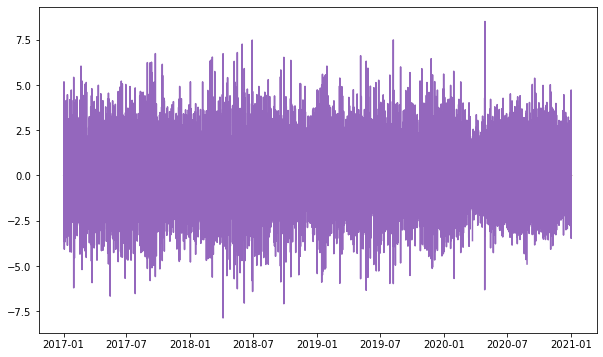

In [18]:
#shifting the differences
dlds=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(dlds)

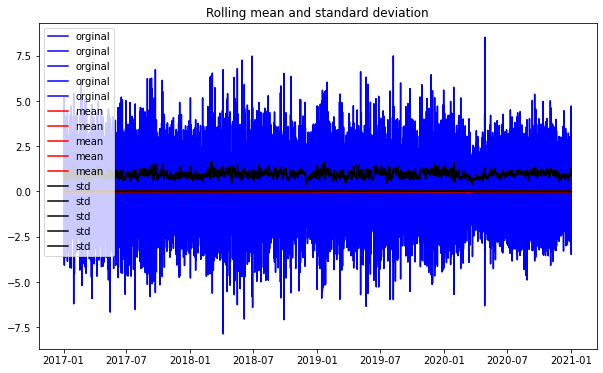

Result of Dickey fuller test:


In [ ]:
dlds.dropna(inplace=True)
test_stationarity(dlds)

In [ ]:
#components of time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logScale)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.sublot(411)
plt.plot(indexedDataset_logScale,label='Orginal')
plt.legend(loc='best')
plt.sublot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.sublot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.sublot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')



decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\Users\ompra\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


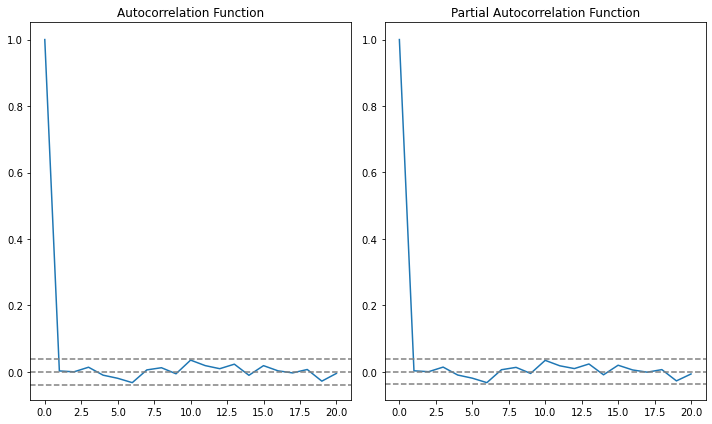

In [45]:
#ACF and PACF graph
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(dlds,nlags=20)
lag_pacf=pacf(dlds,nlags=20,method='ols')


#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


In [ ]:
#arima mode
from statsmodels.tsa.arima_model import ARIMA
#AR model
model=ARIMA(indexedDataset_logScale,order=(0,1,2))
result_AR=model.fit(disp=-1)
plt.plot(dlds)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum(result_AR.fittedvalues-dlds["close"])**2)
print('Plotting AR model')

C:\Users\ompra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ompra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


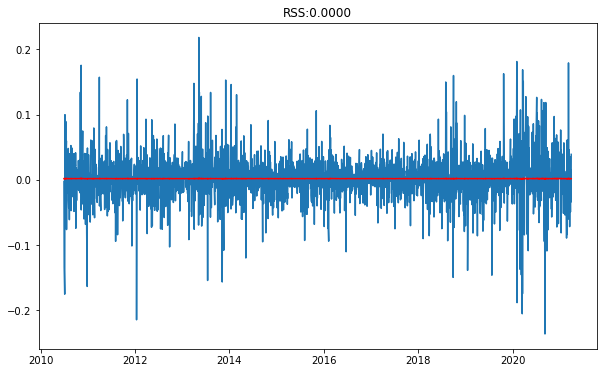

In [51]:
#ma model
model=ARIMA(indexedDataset_logScale,order=(2,1,0))
result_MA=model.fit(disp=-1)
plt.plot(dlds)
plt.plot(result_MA.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum(result_MA.fittedvalues-dlds["close"])**2)
print('Plotting AR model')

In [ ]:

model=ARIMA(indexedDataset_logScale,order=(2,1,2))
result_ARIMA=model.fit(disp=-1)
plt.plot(dlds)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum(result_AR.fittedvalues-dlds["close"])**2)
print('Plotting AR model')

In [56]:
predictions_ARIMA_diff_cumsum=pd.Series(result_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff_cumsum.head())

date
2010-06-30    0.001813
2010-07-01    0.001812
2010-07-02    0.001820
2010-07-06    0.002108
2010-07-07    0.002805
dtype: float64


In [57]:
#convert tu cummilative sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2010-06-30    0.001813
2010-07-01    0.003625
2010-07-02    0.005445
2010-07-06    0.007553
2010-07-07    0.010358
dtype: float64


In [59]:
predictions_ARIMA_log=pd.Series(indexedDataset_logScale['close'].ix[0],index=indexedDataset_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

AttributeError: 'Series' object has no attribute 'ix'

In [60]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)


NameError: name 'predictions_ARIMA_log' is not defined

In [61]:
indexedDataset_logScale

,close
date,
2010-06-29,1.564022
2010-06-30,1.561507
2010-07-01,1.479785
2010-07-02,1.345472
2010-07-06,1.170002
...,...
2021-03-24,6.446148
2021-03-25,6.462077
2021-03-26,6.427637


C:\Users\ompra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\ompra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\ompra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


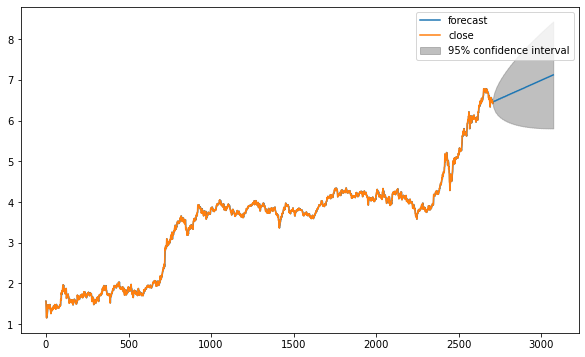

In [62]:
result_ARIMA.plot_predict(1,3072)
x=result_ARIMA.forecast(steps=120)

In [63]:
x[1]

array([0.03551981, 0.05014871, 0.06126866, 0.07053842, 0.0786195 ,
       0.08587136, 0.09252388, 0.09873659, 0.10462239, 0.11025848,
       0.11569272, 0.12094907, 0.12603363, 0.13094143, 0.13566353,
       0.14019331, 0.14453124, 0.14868713, 0.15268016, 0.15653666,
       0.16028666, 0.16395964, 0.16758059, 0.1711667 , 0.17472548,
       0.17825457, 0.18174347, 0.18517666, 0.18853778, 0.19181363,
       0.19499735, 0.19809002, 0.2011005 , 0.20404383, 0.20693845,
       0.20980295, 0.2126529 , 0.21549829, 0.21834197, 0.2211795 ,
       0.22400049, 0.22679114, 0.22953738, 0.23222808, 0.23485743,
       0.23742607, 0.23994092, 0.24241372, 0.24485875, 0.24729017,
       0.24971944, 0.25215331, 0.25459263, 0.2570324 , 0.25946302,
       0.26187241, 0.26424874, 0.266583  , 0.2688708 , 0.27111327,
       0.27331668, 0.27549111, 0.27764848, 0.27980027, 0.28195537,
       0.28411847, 0.2862892 , 0.28846232, 0.29062895, 0.29277847,
       0.29490086, 0.29698886, 0.29903937, 0.30105405, 0.30303

In [64]:
len(x[1])

120

In [65]:
np.exp(x[1])

array([1.03615817, 1.05142745, 1.06318451, 1.0730858 , 1.08179263,
       1.08966614, 1.09693934, 1.10377551, 1.11029127, 1.11656664,
       1.12265085, 1.12856743, 1.13432031, 1.13990102, 1.14529647,
       1.15049619, 1.15549779, 1.16030991, 1.16495232, 1.16945364,
       1.17384731, 1.17816677, 1.18244058, 1.18668855, 1.19091924,
       1.19512953, 1.19930649, 1.20343102, 1.2074827 , 1.21144472,
       1.21530777, 1.21907213, 1.22274765, 1.22635191, 1.22990687,
       1.23343498, 1.23695523, 1.24047987, 1.24401241, 1.24754734,
       1.25107164, 1.25456781, 1.25801789, 1.2614074 , 1.26472844,
       1.26798125, 1.27117405, 1.2743213 , 1.27744087, 1.28055064,
       1.28366523, 1.2867933 , 1.28993603, 1.29308703, 1.29623385,
       1.29936074, 1.30245213, 1.30549594, 1.30848607, 1.31142361,
       1.3143164 , 1.3171774 , 1.32002211, 1.32286557, 1.32571955,
       1.32859032, 1.33147746, 1.33437407, 1.3372683 , 1.34014587,
       1.34299321, 1.3458003 , 1.34856271, 1.35128238, 1.35396